In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-9364007-0003.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-9476607-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-2831144-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-7720431-0003.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-1514320-0002.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-6950003-0003.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-874167-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-4276353-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/BACTERIA-9857270-0004.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-3565661-0001.jpeg
/kaggle/input/computer-vision/chest_xray/test/PNEUMONIA/VIRUS-3174339-0001.jpeg
/kaggle/input/computer-

In [6]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [7]:
!gdown https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_

Downloading...
From (uriginal): https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_
From (redirected): https://drive.google.com/uc?id=1FxvmwTrYZsMyCMfH_mcrLJ2oStXABQG_&confirm=t&uuid=06efc4a7-0bed-46a4-86ca-5cd185462bb2
To: /kaggle/working/dataset.zip
100%|██████████████████████████████████████| 1.26G/1.26G [00:15<00:00, 83.3MB/s]


In [8]:
import zipfile
with zipfile.ZipFile("/kaggle/working/dataset.zip",'r') as zip_ref:
    zip_ref.extractall("/kaggle/working/")

In [9]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNet
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
import os
import cv2
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from collections import Counter
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display
import matplotlib.cm as cm

In [10]:
train_dir = '/kaggle/working/chest_xray/train'
test_dir = '/kaggle/working/chest_xray/test'

In [11]:
Normalimages = os.listdir(train_dir + "/NORMAL")
Pneumonaimages = os.listdir(train_dir + "/PNEUMONIA")

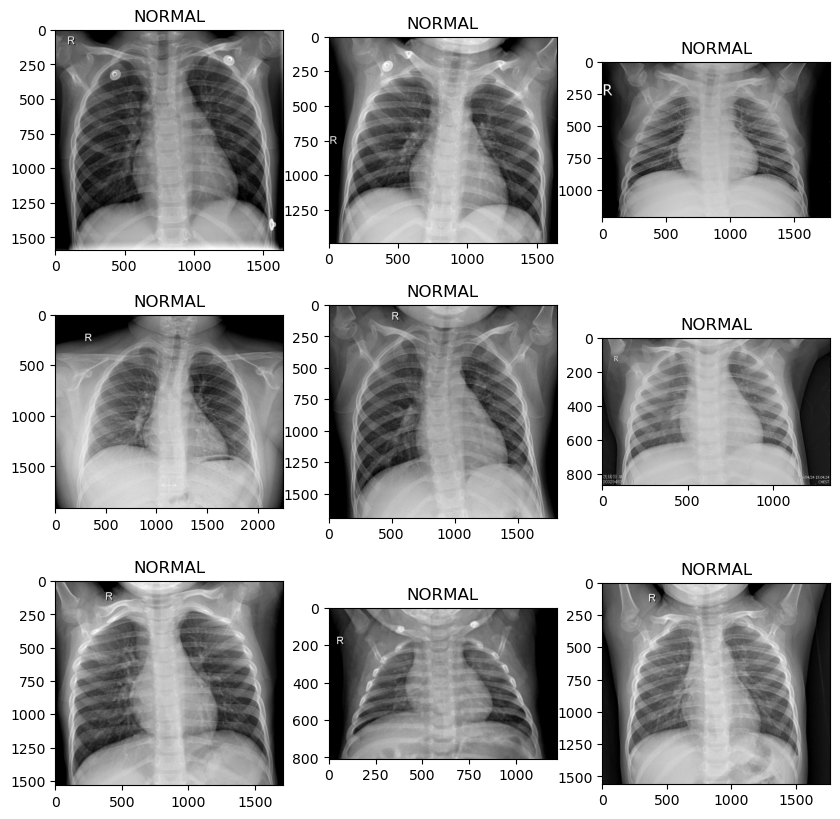

In [12]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_dir + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")
plt.show()

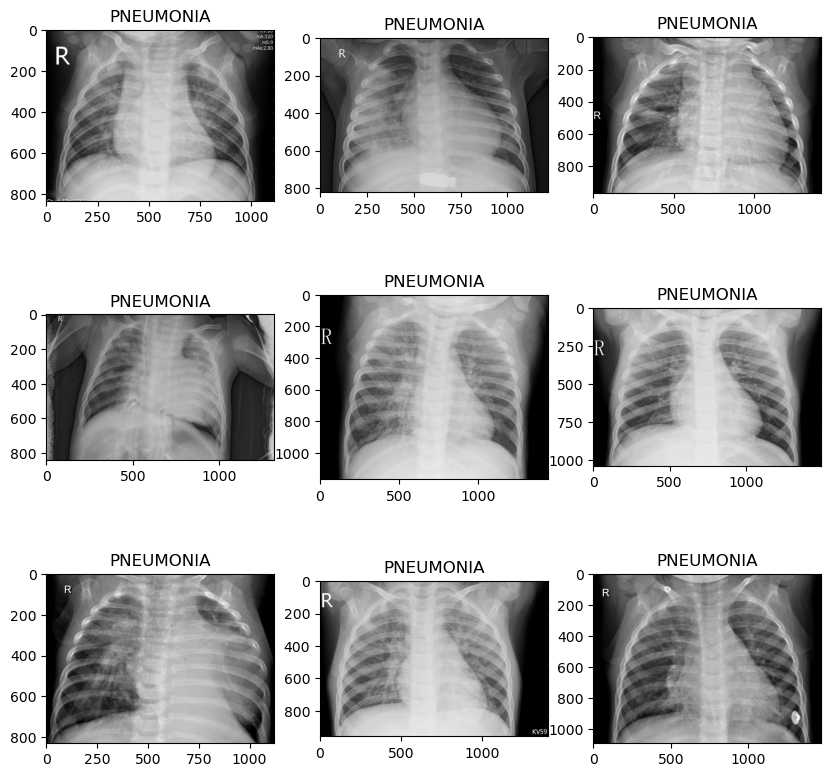

In [25]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(train_dir + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
plt.show()

In [26]:
print("\nTrain set:")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

print("\nTest set:")
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")



pneumonia = os.listdir("/kaggle/working/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/kaggle/working/chest_xray/train/PNEUMONIA"


Train set:
PNEUMONIA=3883
NORMAL=1349

Test set:
PNEUMONIA=390
NORMAL=234


In [27]:
pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

In [28]:
data = pd.DataFrame(np.concatenate([[0]*len(normal_train) , [1]*len(pneumonia_train)]),columns=["class"])

In [29]:
data.head()

,class
0,0
1,0
2,0
3,0
4,0


In [30]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [31]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=32,
                                       class_mode='binary'
                                       )


test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=2,
                                       class_mode='binary'
                                      )

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [32]:
MobileNet_model = tf.keras.applications.MobileNet(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in MobileNet_model.layers:
    layer.trainable=False

x = MobileNet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=MobileNet_model.input, outputs=predictions)


# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [33]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)
history = model2.fit(train,epochs=10, validation_data=test, steps_per_epoch=100,callbacks=[early_stopping,lr], batch_size=32)

Epoch 1/10
100/100 [==============================] - 182s 2s/step - loss: 0.2633 - accuracy: 0.8860 - val_loss: 0.2365 - val_accuracy: 0.9103 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 196s 2s/step - loss: 0.2065 - accuracy: 0.9150 - val_loss: 0.1978 - val_accuracy: 0.9279 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 197s 2s/step - loss: 0.1835 - accuracy: 0.9250 - val_loss: 0.1708 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 197s 2s/step - loss: 0.1596 - accuracy: 0.9334 - val_loss: 0.1908 - val_accuracy: 0.9151 - lr: 0.0010
Epoch 5/10
100/100 [==============================] - 196s 2s/step - loss: 0.1661 - accuracy: 0.9322 - val_loss: 0.1989 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 6/10
100/100 [==============================] - 176s 2s/step - loss: 0.1405 - accuracy: 0.9472 - val_loss: 0.3000 - val_accuracy: 0.8814 - lr: 0.0010
Epoch 7/10
100/100 [==============================] - 176s 2s/st

In [34]:
# Evaluating the model on train and test
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

164/164 [==============================] - 252s 2s/step - loss: 0.1412 - accuracy: 0.9459
Train Loss:  0.14116451144218445
Train Accuracy:  0.9459097981452942
312/312 [==============================] - 23s 74ms/step - loss: 0.1812 - accuracy: 0.9327

Test loss:  0.1812201738357544
Test Accuracy:  0.932692289352417


In [35]:
model2.save('MobileNet.h5')

In [38]:
model = load_model('/kaggle/working/MobileNet.h5')

Activation Visualization

1/1 [==============================] - 1s 705ms/step


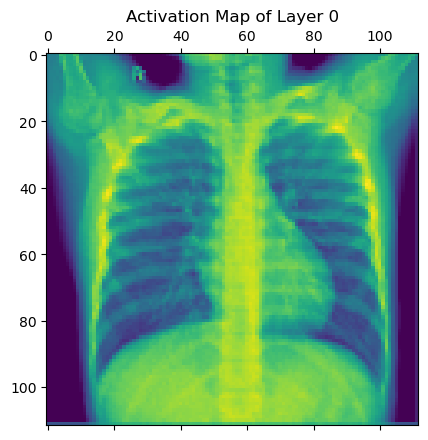

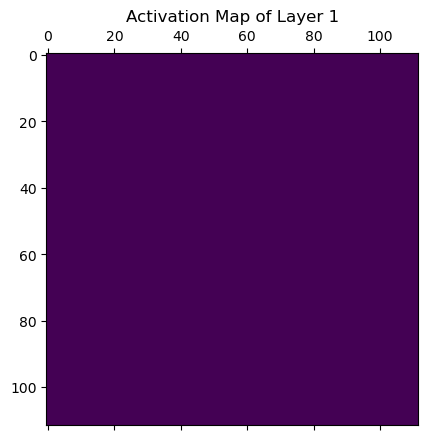

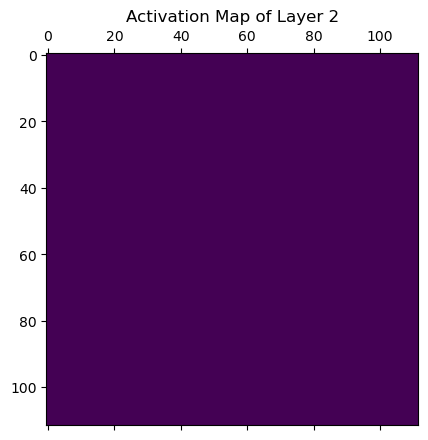

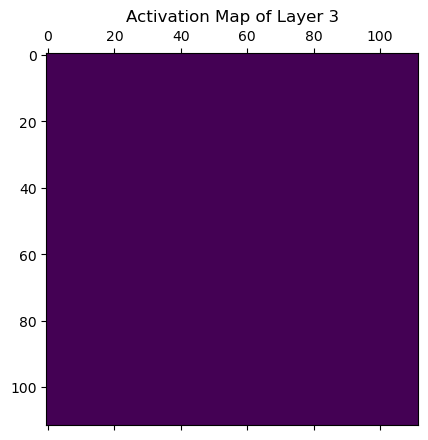

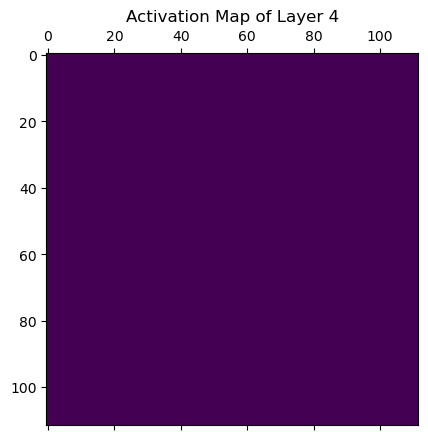

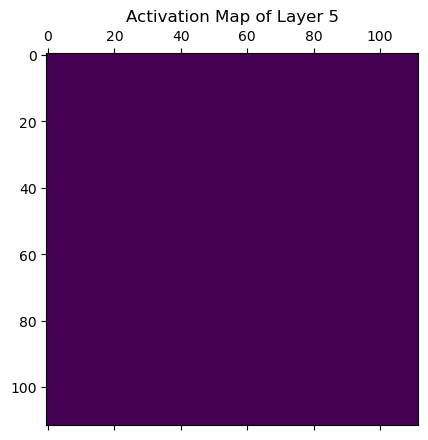

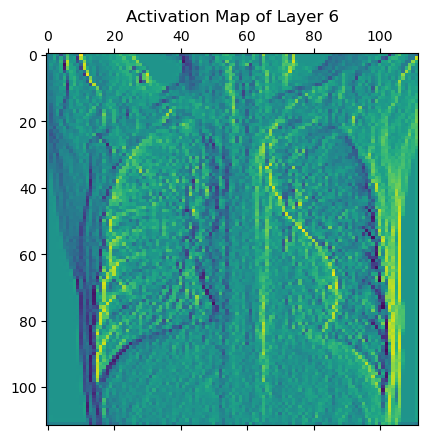

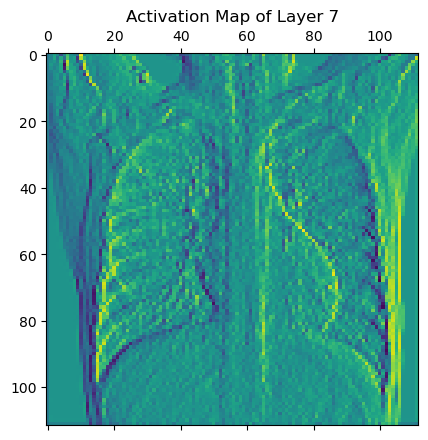

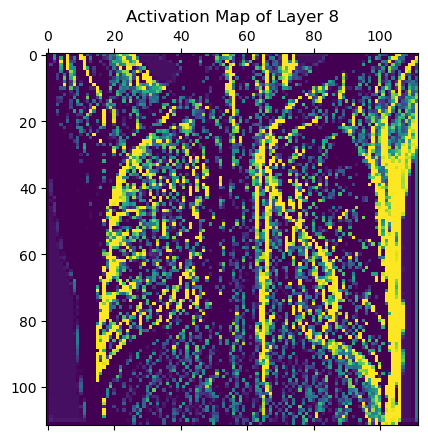

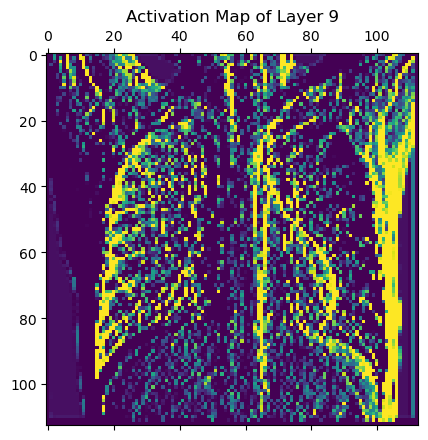

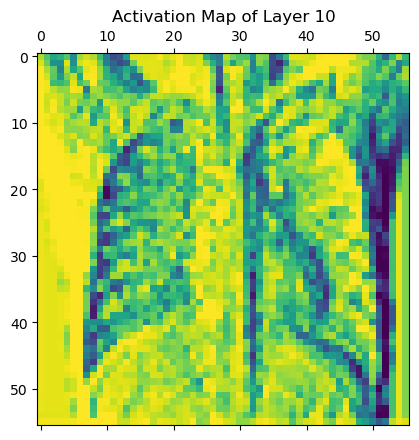

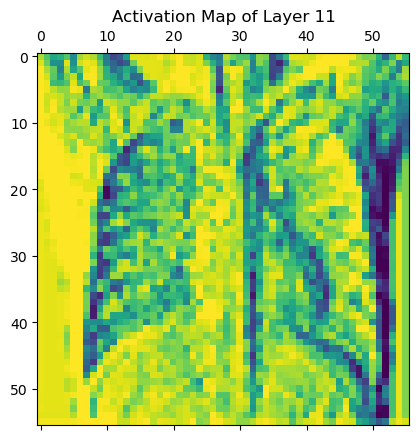

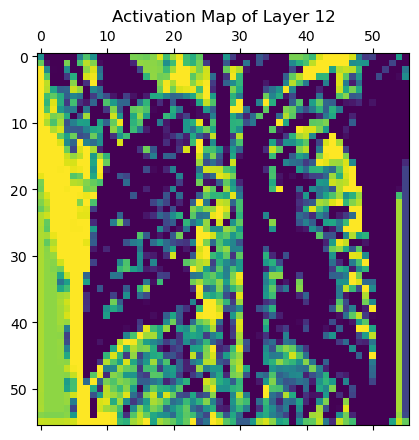

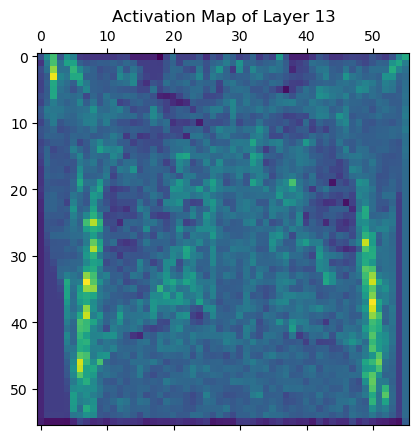

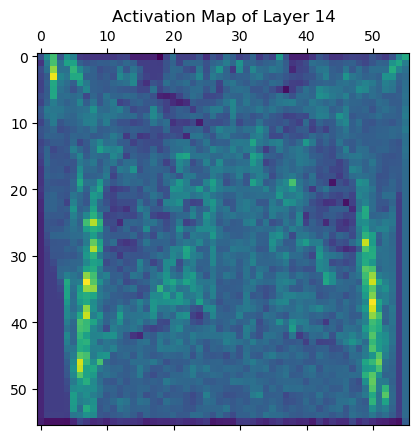

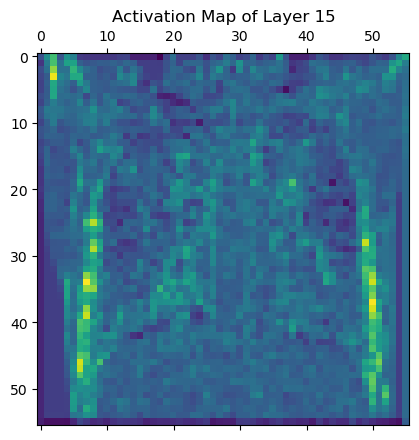

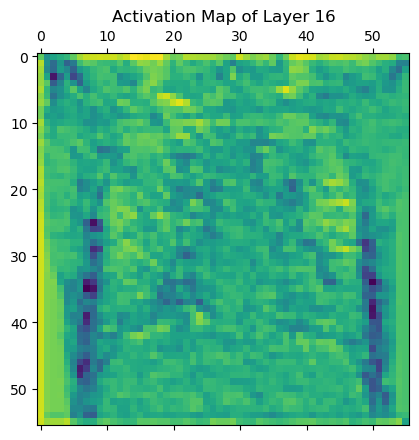

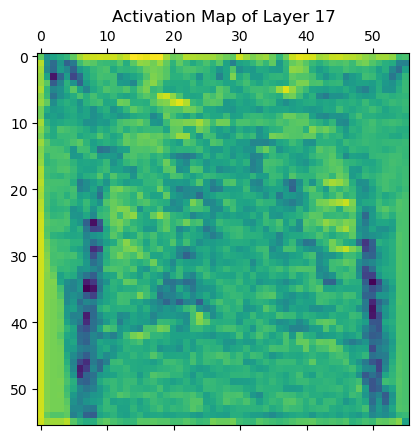

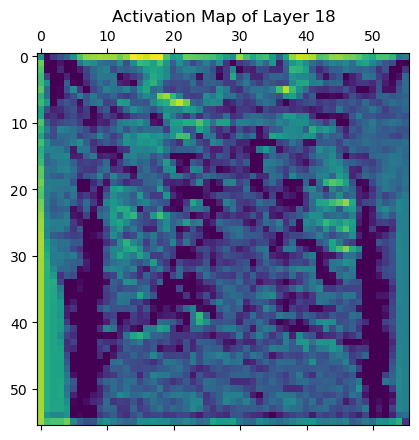

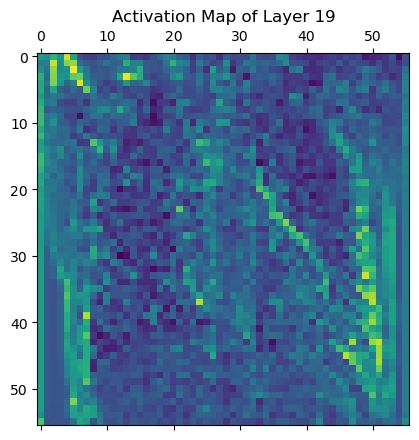

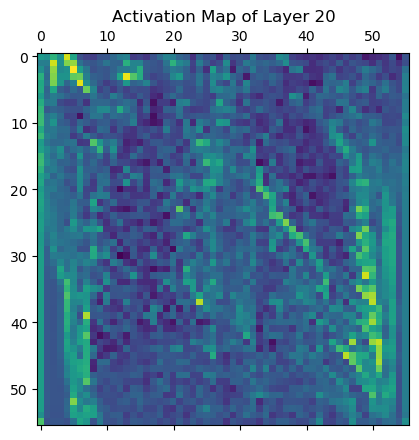

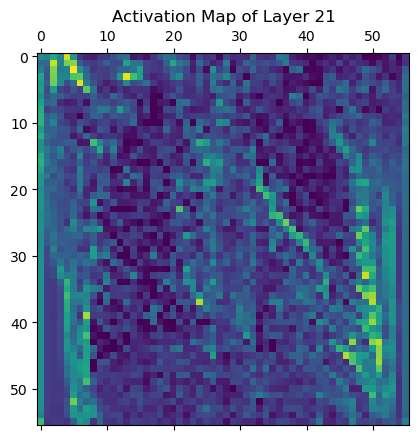

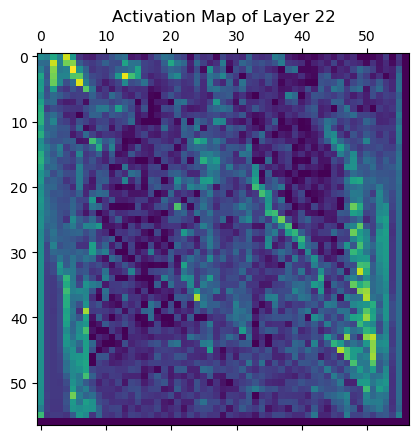

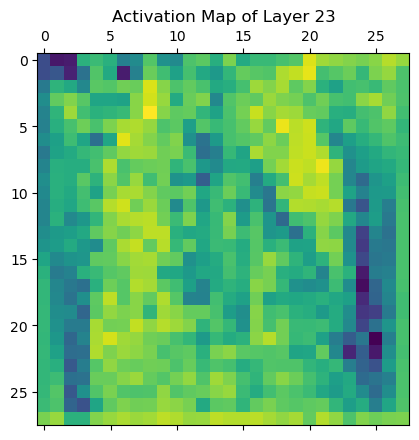

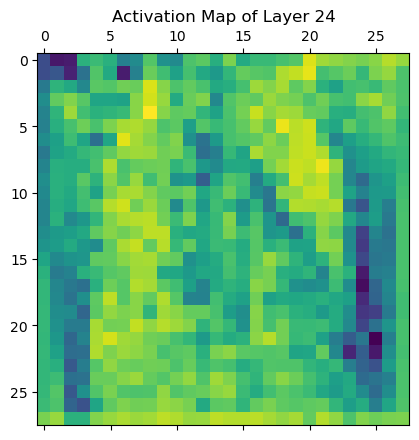

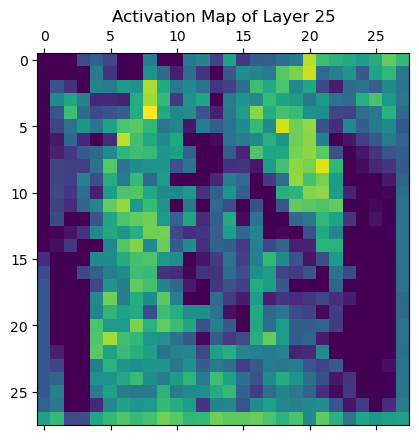

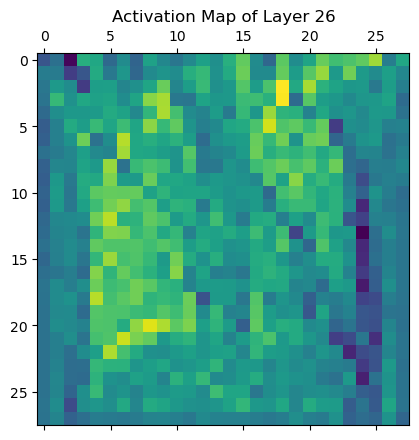

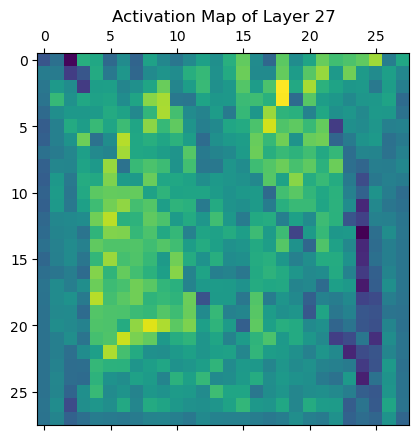

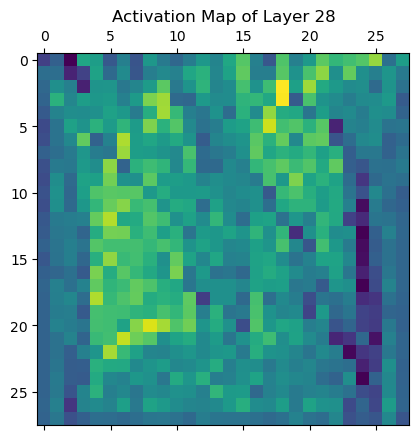

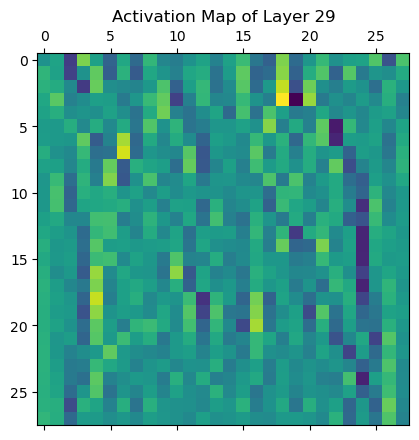

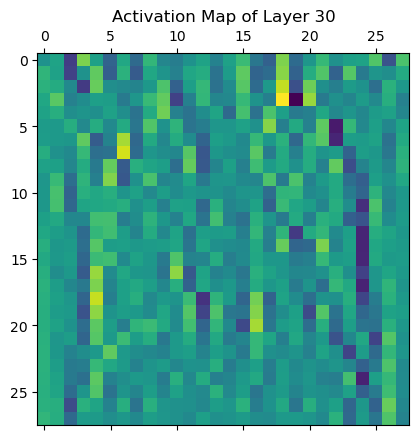

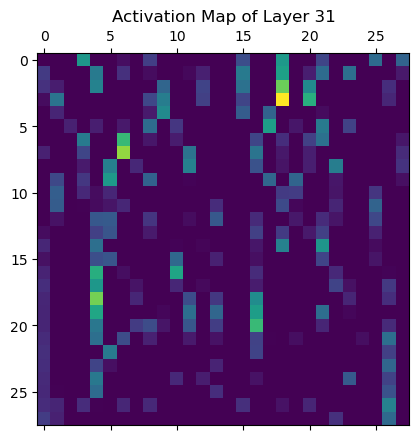

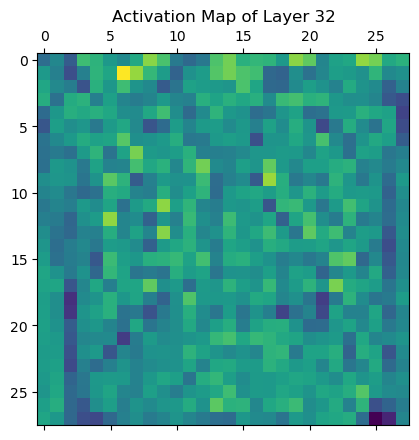

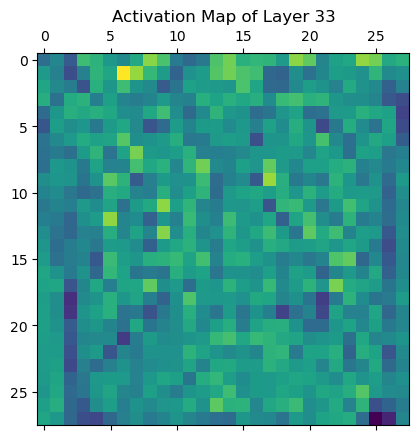

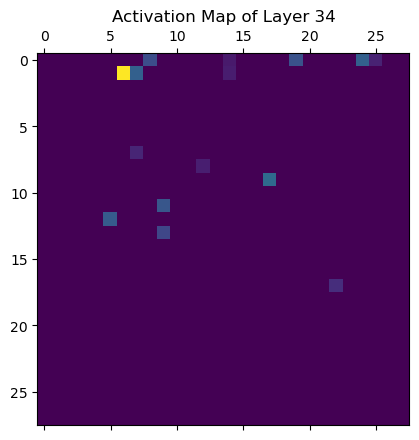

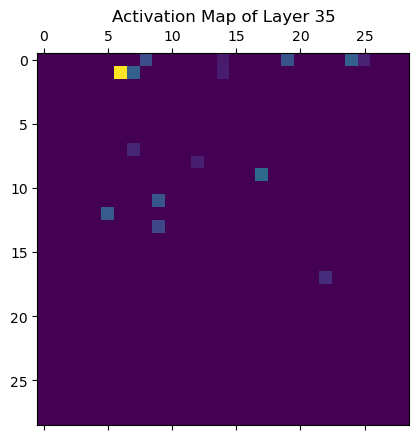

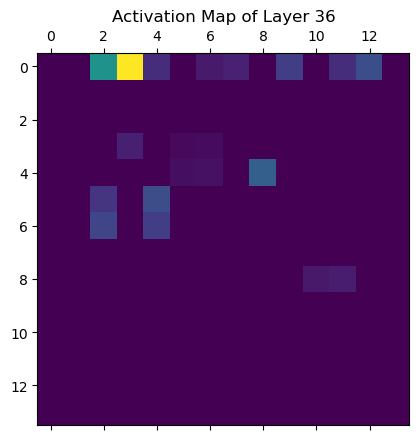

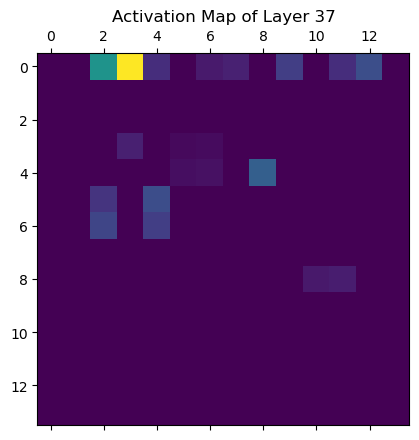

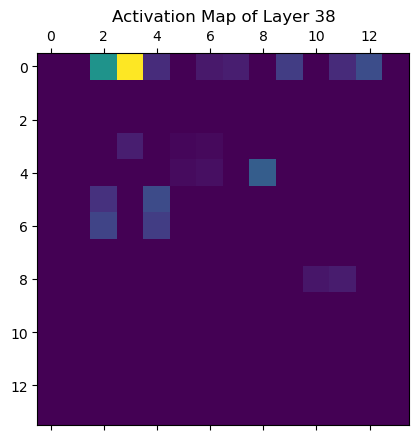

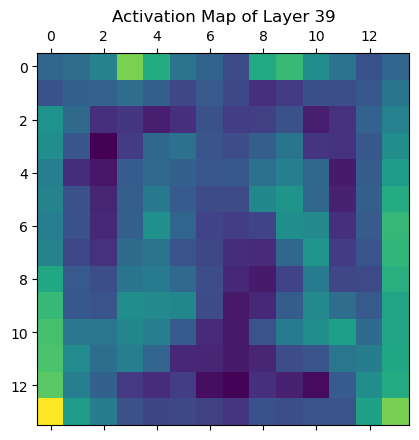

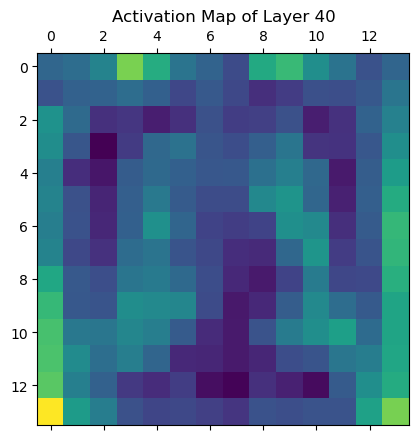

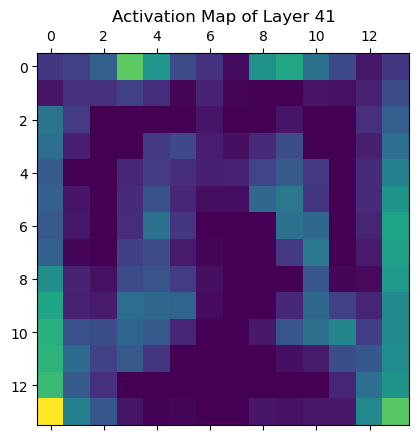

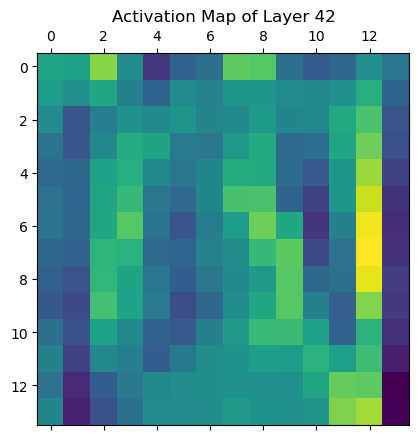

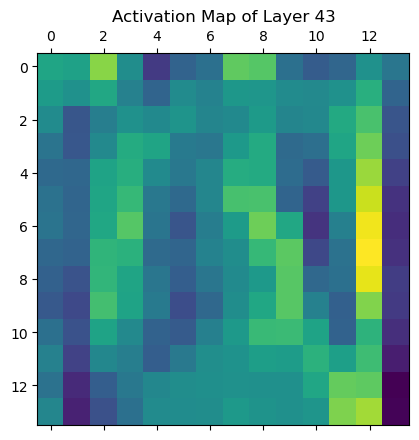

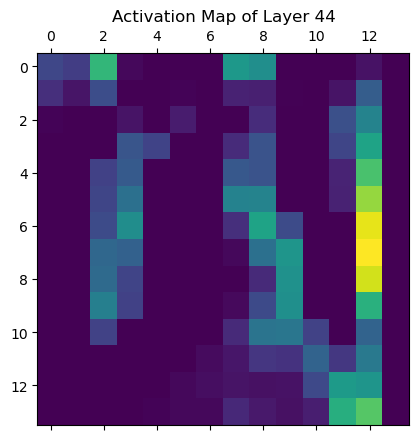

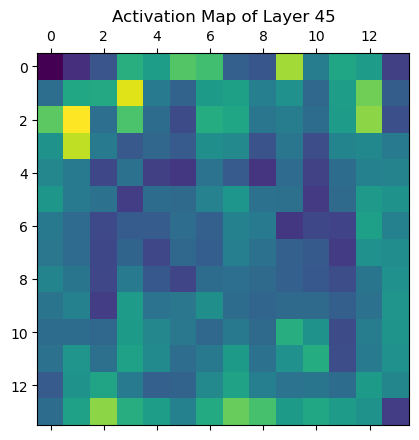

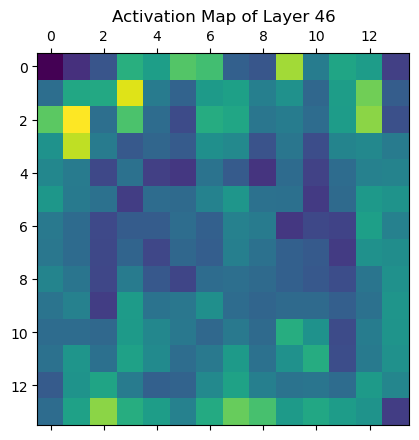

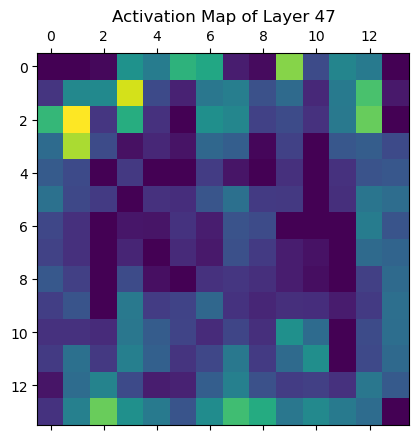

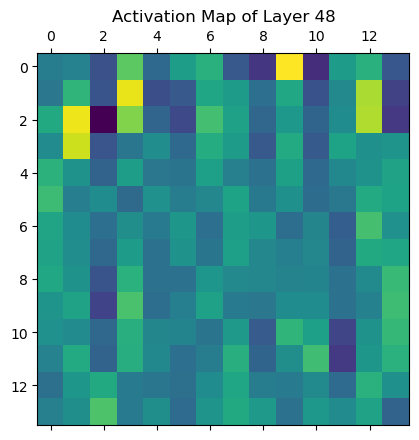

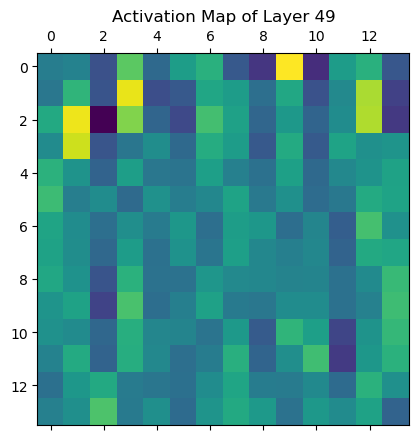

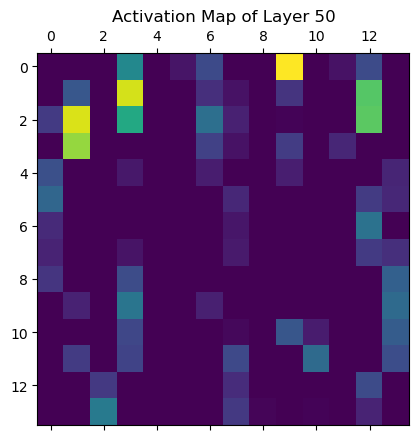

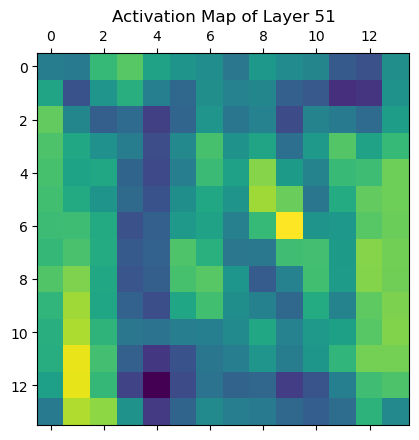

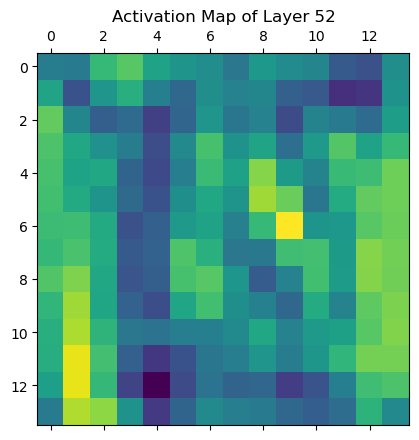

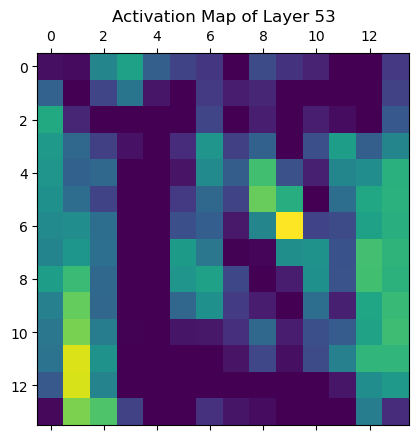

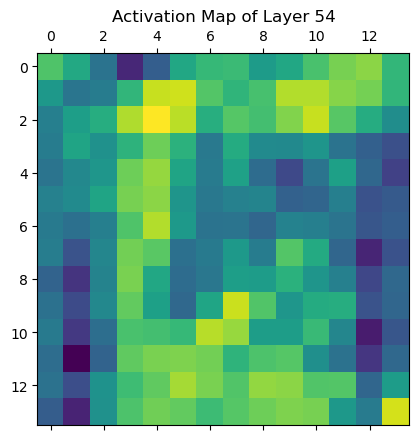

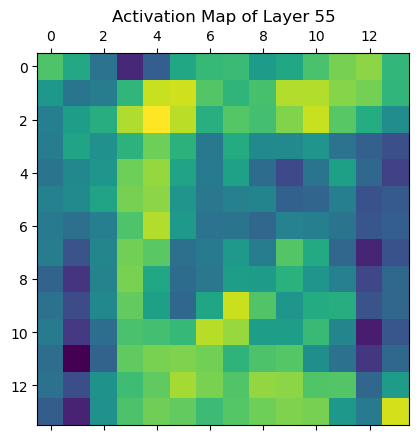

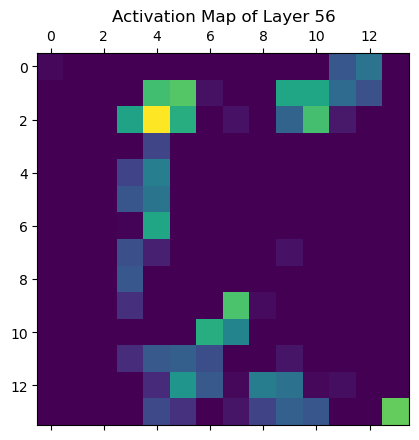

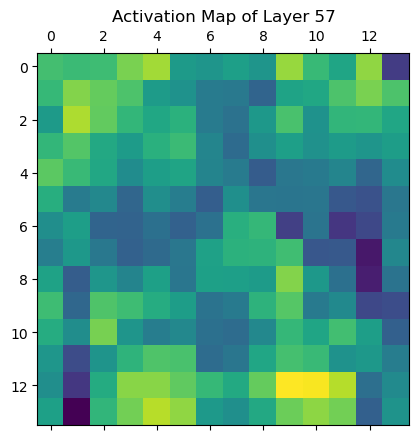

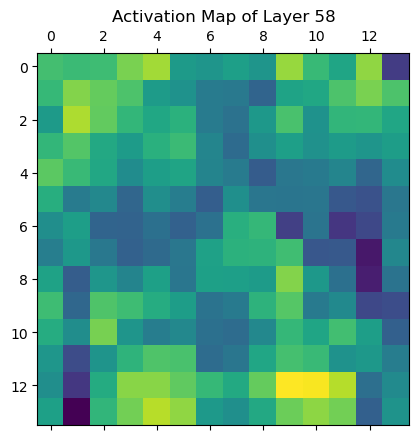

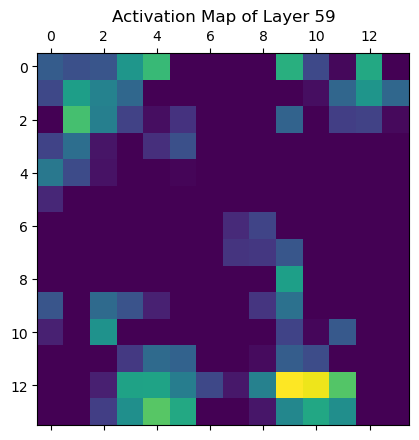

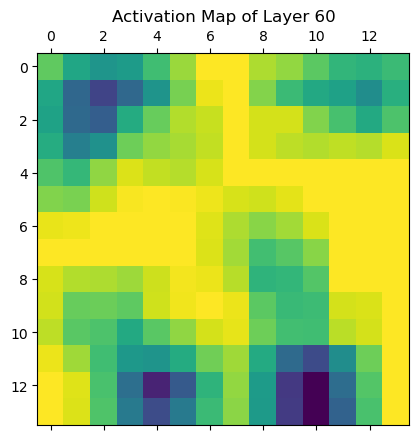

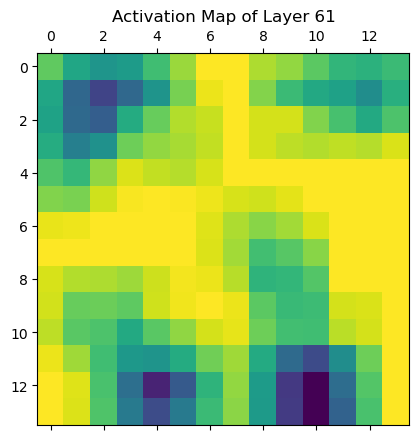

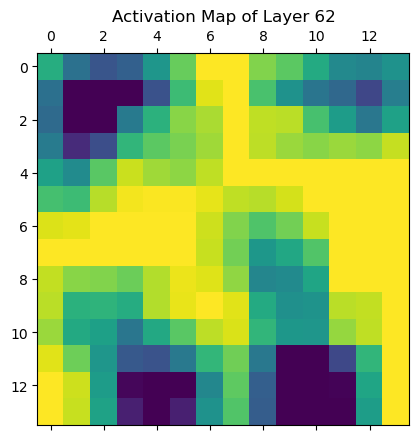

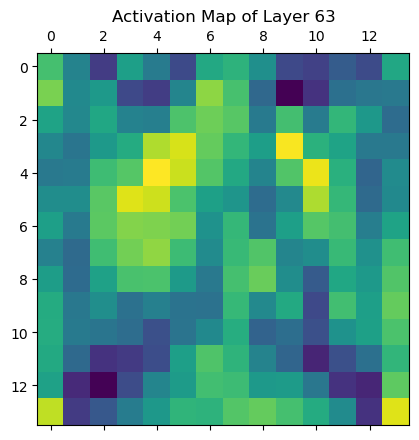

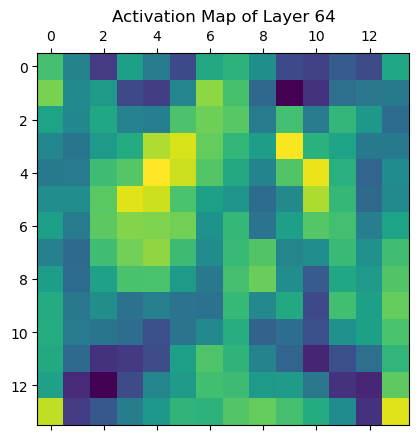

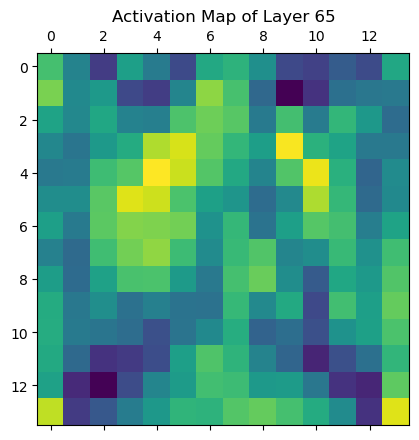

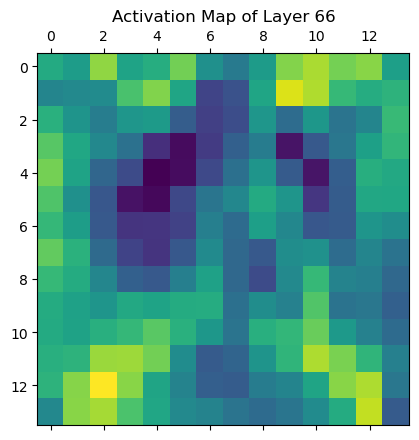

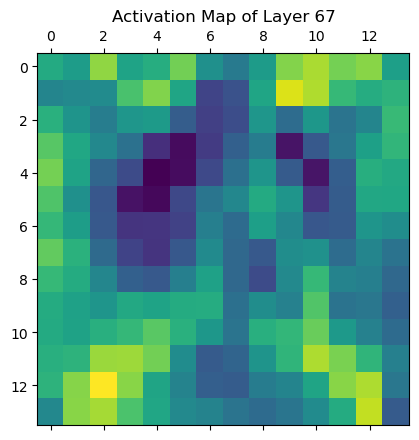

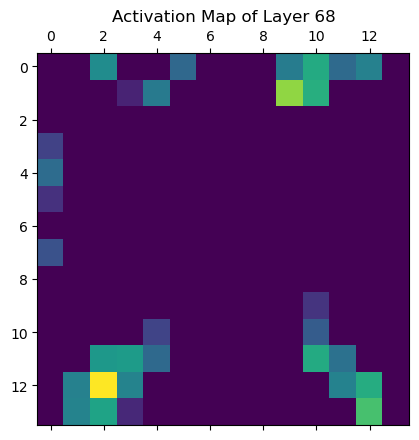

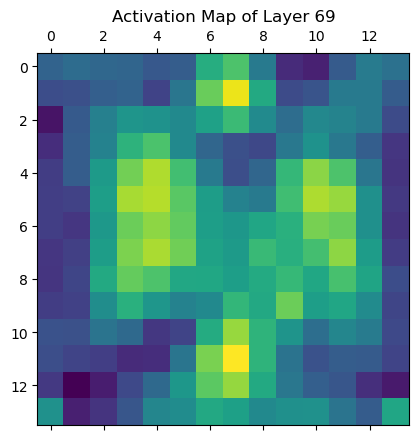

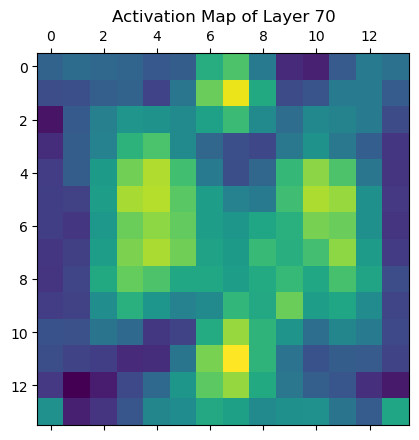

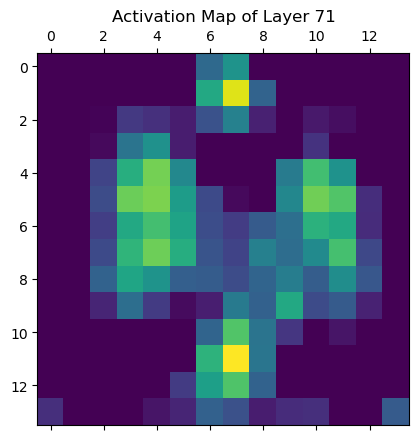

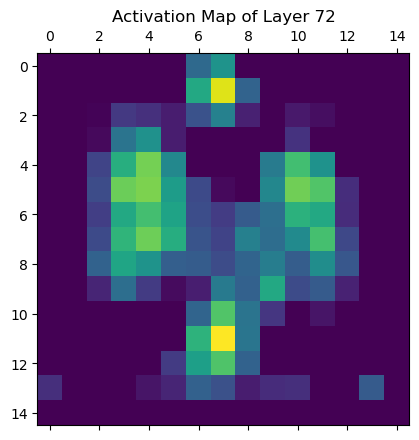

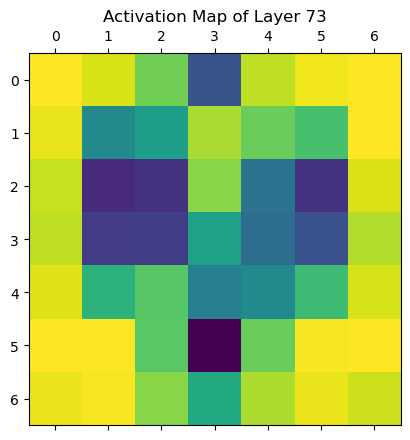

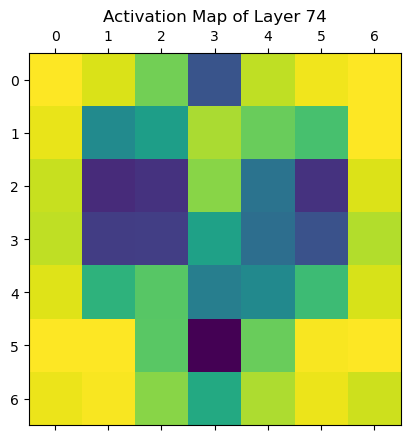

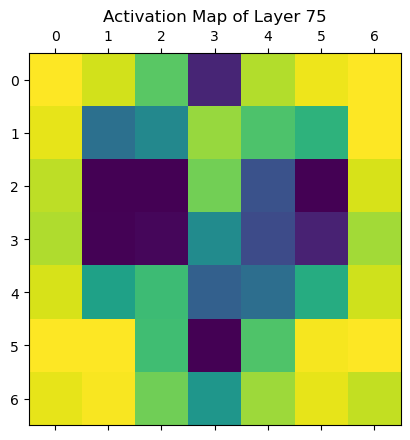

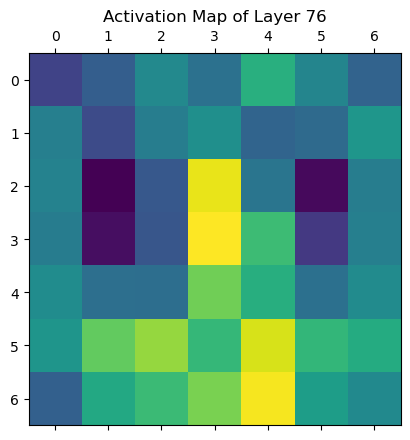

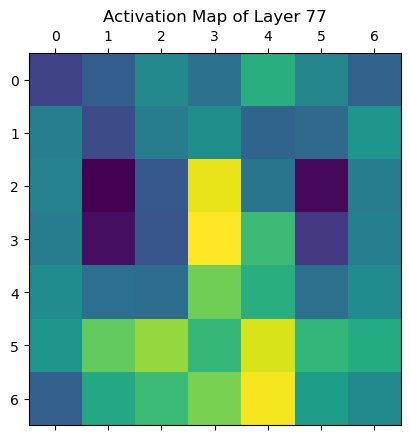

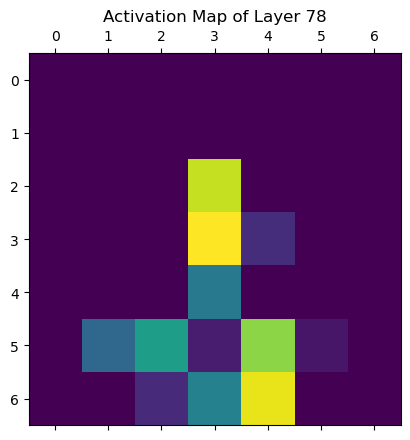

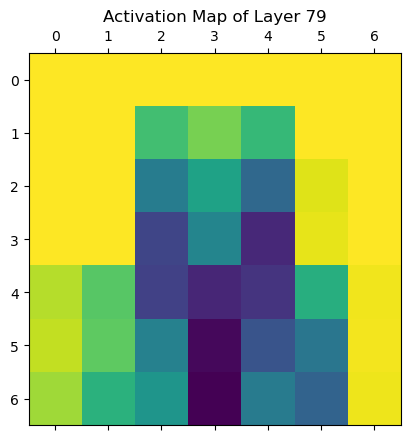

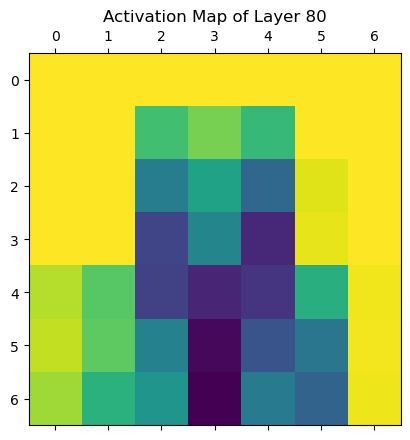

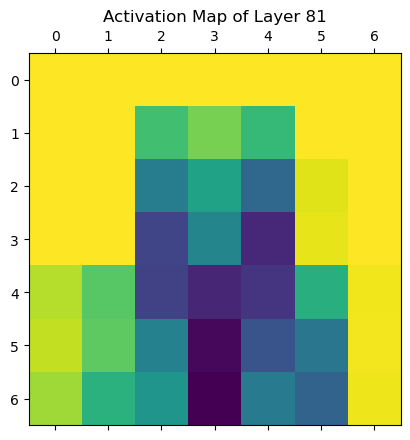

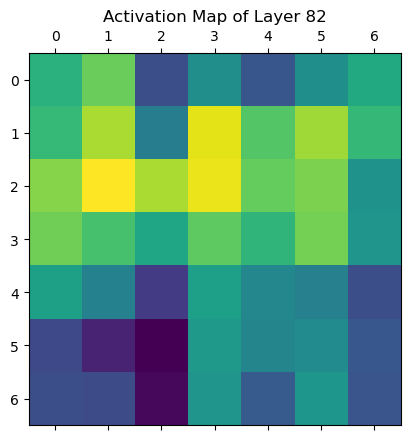

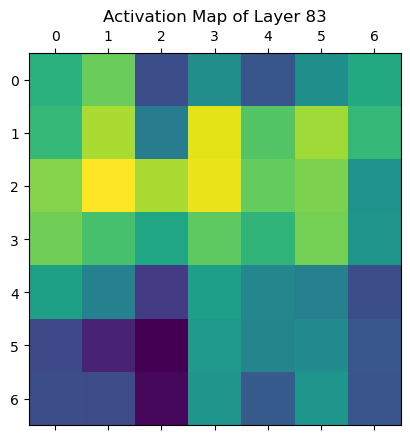

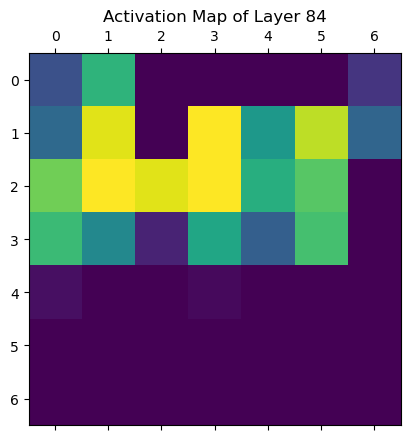

In [46]:
img = tf.keras.preprocessing.image.load_img('/kaggle/input/computer-vision/chest_xray/train/NORMAL/NORMAL-1003233-0001.jpeg', target_size=(224, 224))


x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet .preprocess_input(x)
x = tf.expand_dims(x, axis=0)


layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
activations = activation_model.predict(x)


for i, activation in enumerate(activations):
    plt.matshow(activation[0, :, :, 0], cmap='viridis')
    plt.title('Activation Map of Layer {}'.format(i))
    plt.show()

Grad_CAM

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [55]:
img_path="/kaggle/input/computer-vision/chest_xray/test/NORMAL/NORMAL-1283091-0001.jpeg"
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(size, size))
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array / 255.0



def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]


    grads = tape.gradient(class_channel, last_conv_layer_output)


    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)


    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):

    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)


    heatmap = np.uint8(255 * heatmap)


    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]


    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)


    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)


    superimposed_img.save(cam_path)
    return cam_path

preprocess_input = tf.keras.applications.mobilenet.preprocess_input
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

last_conv_layer_name = "conv_pw_13_relu"
img_size = (224,224)


model.layers[-1].activation = None

/tmp/ipykernel_33/3733430637.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


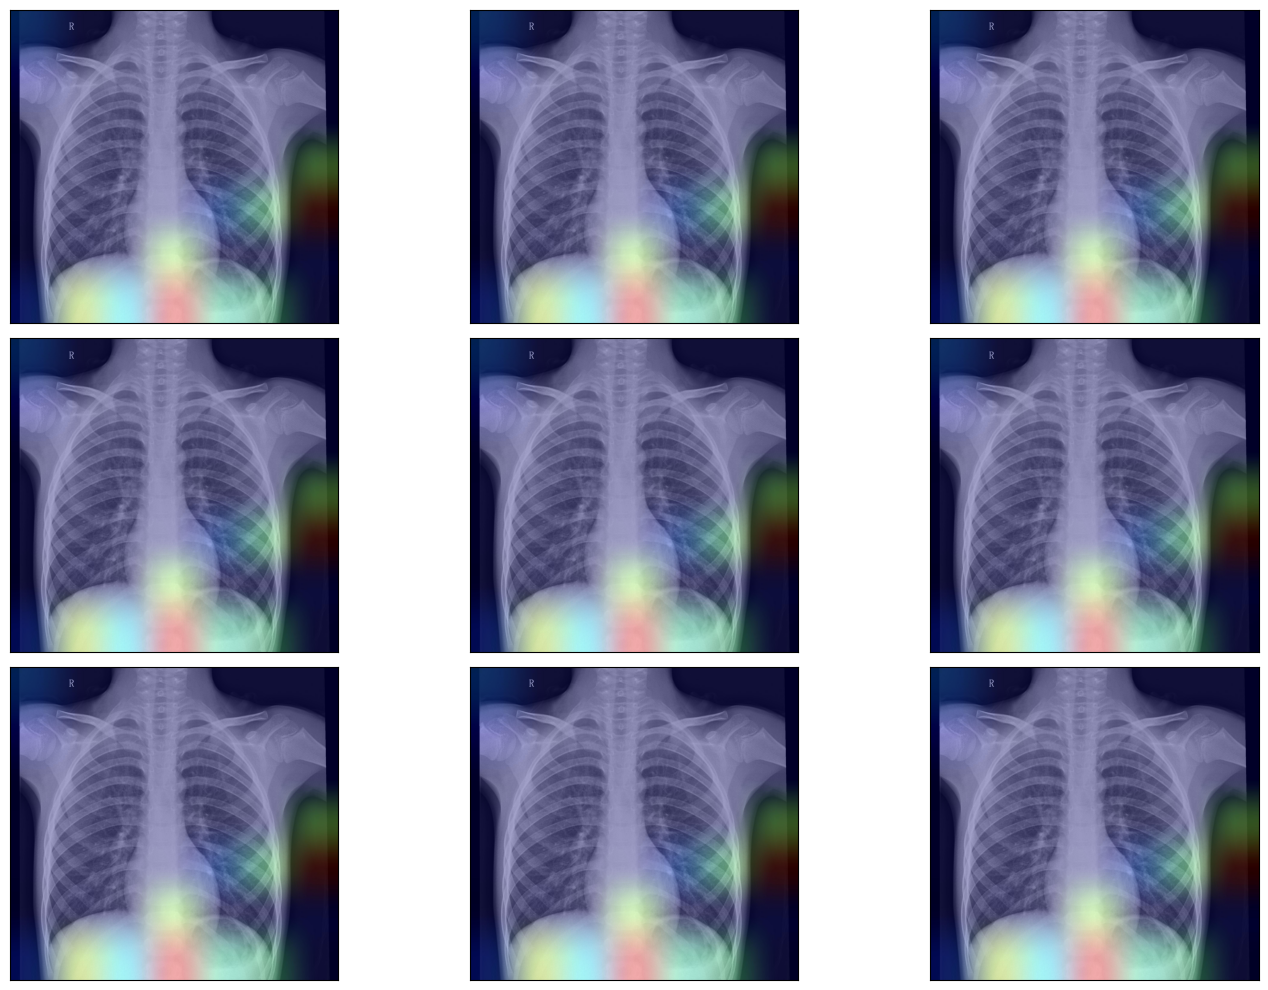

In [56]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img_path = "/kaggle/input/computer-vision/chest_xray/test/NORMAL/NORMAL-1049278-0001.jpeg"
    img_array = get_img_array(img_path, size=224)
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
    cam_path = save_and_display_gradcam(img_path, heatmap)
    ax.imshow(plt.imread(cam_path))

plt.tight_layout()
plt.show()